In [1]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
import pandas as pd
import sklearn as sk
import numpy as np
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Bagging on Boston dataset-----------------------------------------------------------------------

In [2]:
house=pd.read_csv("Boston.csv")
house.head(5)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
###Splitting the dataset into training and testing datasets

house_train,house_test=train_test_split(house,train_size=0.9)

In [4]:
###Building a linear Regression with medv as the predictor variable on the training dataset ###

lr = LinearRegression()
lr.fit(house_train[['crim']+['zn']+['indus']+['chas']+['nox']+['rm']+['age']+['dis']+['rad']+['tax']+['ptratio']+['black']+['lstat']],house_train[['medv']])

LinearRegression()

In [5]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1)

In [6]:
###predicting the model on test dataset
predict_test=lr.predict(house_test[['crim']+['zn']+['indus']+['chas']+['nox']+['rm']+['age']+['dis']+['rad']+['tax']+['ptratio']+['black']+['lstat']])

In [7]:
from sklearn.metrics import mean_squared_error

###error in linear regression model ###
mean_squared_error(house_test['medv'],predict_test, sample_weight=None, multioutput='uniform_average')

24.699157008319585

In [8]:
#Build the regression model using bagging technique. 

Bag=BaggingRegressor(base_estimator=LinearRegression(), n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=1, random_state=None, verbose=0)
features = list(house.columns[:13])

X = house_train[features]
y = house_train['medv']

Bag.fit(X,y)
bagpredict_test=Bag.predict(house_test[features])

z=(house_test[['medv']])

In [9]:
### to estimate the accuracy of the Bagging model ###

mean_squared_error(z, bagpredict_test, sample_weight=None, multioutput='uniform_average')

36.36352269675147

# Bagging on Titatnic Dataset -----------------------------------------------------------------

In [10]:
df = pd.read_csv("titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.dropna(inplace=True)

In [12]:
df['Pclass'].unique()

array([1, 3, 2], dtype=int64)

In [13]:
df['Pclass'].value_counts()

1    158
2     15
3     10
Name: Pclass, dtype: int64

In [14]:
df['Sex'].value_counts()

male      95
female    88
Name: Sex, dtype: int64

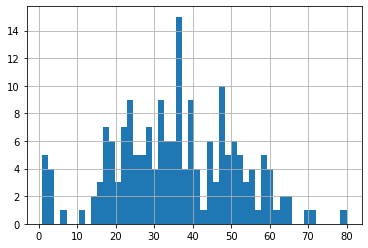

In [15]:
df['Age'].hist(bins=50);

In [33]:
df['Survived'].value_counts()

1    123
0     60
Name: Survived, dtype: int64

### Data preprocessing

In [16]:
X = df[['Pclass', 'Sex', 'Age']]

In [17]:
X

,Pclass,Sex,Age
1,1,female,38.0
3,1,female,35.0
6,1,male,54.0
10,3,female,4.0
11,1,female,58.0
...,...,...,...
871,1,female,47.0
872,1,male,33.0
879,1,female,56.0
887,1,female,19.0


In [18]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [19]:
X['Sex'] = lb.fit_transform(X['Sex'])
X

<ipython-input-19-d7141eaf16d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = lb.fit_transform(X['Sex'])


,Pclass,Sex,Age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0
...,...,...,...
871,1,0,47.0
872,1,1,33.0
879,1,0,56.0
887,1,0,19.0


In [20]:
X.shape

(183, 3)

In [21]:
X.describe()

,Pclass,Sex,Age
count,183.000000,183.000000,183.000000
mean,1.191257,0.519126,35.674426
std,0.515187,0.501005,15.643866
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.500000
max,3.000000,1.000000,80.000000


In [22]:
# ASSUMING FEATURE

y = df['Survived']
y.value_counts()

1    123
0     60
Name: Survived, dtype: int64

### Fit model 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:----\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:-----\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

### Decision Tree

In [25]:
clf = DecisionTreeClassifier(random_state=42)

In [26]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:----

accuracy score: 0.9453

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        38
           1       0.98      0.94      0.96        90

    accuracy                           0.95       128
   macro avg       0.93      0.95      0.94       128
weighted avg       0.95      0.95      0.95       128


Confusion Matrix: 
 [[36  2]
 [ 5 85]]

Average Accuracy: 	 0.7968
Accuracy SD: 		 0.0619


In [28]:
print_score(clf, X_train, y_train, X_test, y_test, train=False) # Test

Test Result:-----

accuracy score: 0.7273

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.68      0.67        22
           1       0.78      0.76      0.77        33

    accuracy                           0.73        55
   macro avg       0.72      0.72      0.72        55
weighted avg       0.73      0.73      0.73        55


Confusion Matrix: 
 [[15  7]
 [ 8 25]]



In [29]:
pred_label = clf.predict(X_test)

In [35]:
pred_label   # predicting all labels for column 'Survived'

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)